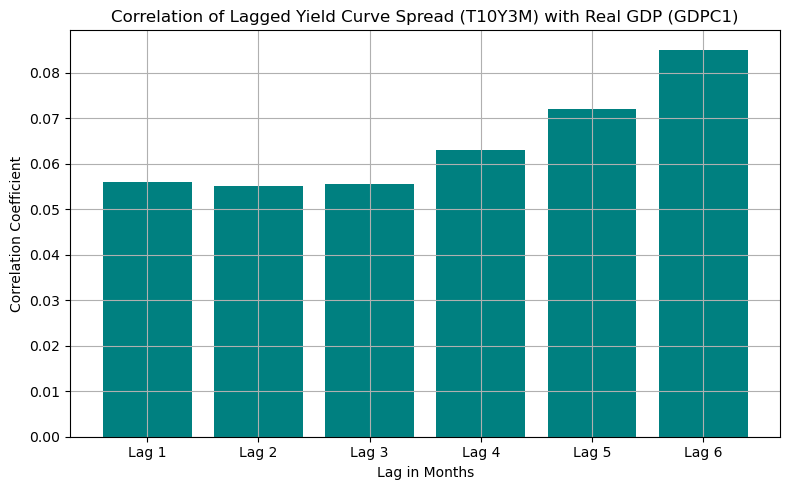

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from Downloads
df = pd.read_csv("/Users/irisduan/Downloads/combined_dataset (1).csv")

# Convert observation_date to datetime and set as index
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

# Create lagged versions of the yield curve spread (T10Y3M)
for lag in range(1, 7):
    df[f"T10Y3M_lag_{lag}"] = df["T10Y3M"].shift(lag)

# Calculate correlation between lagged yield curve and GDP
correlations = {
    f"Lag {lag}": df[f"T10Y3M_lag_{lag}"].corr(df["GDPC1"])
    for lag in range(1, 7)
}

# Plot the correlations
plt.figure(figsize=(8, 5))
plt.bar(correlations.keys(), correlations.values(), color='teal')
plt.title("Correlation of Lagged Yield Curve Spread (T10Y3M) with Real GDP (GDPC1)")
plt.xlabel("Lag in Months")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()


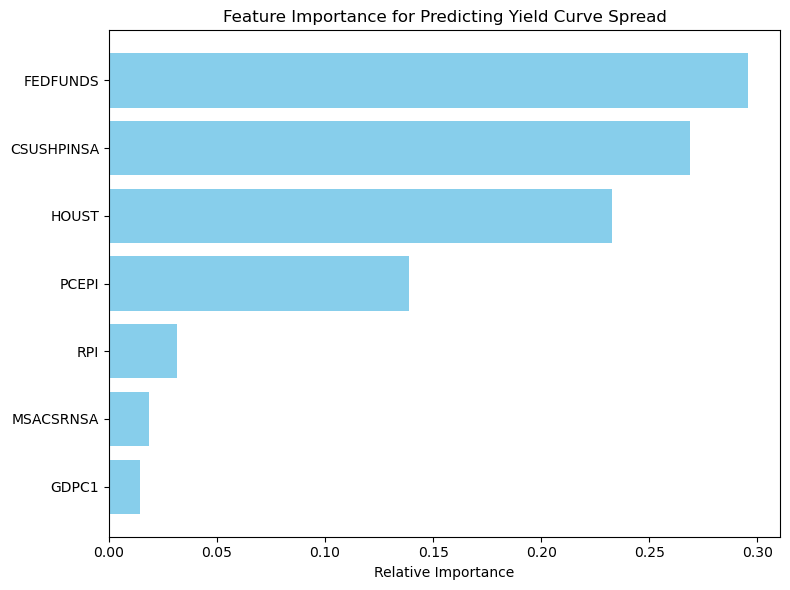

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# STEP 1: Load your data
df = pd.read_csv("/Users/irisduan/Downloads/combined_dataset (1).csv")
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

# STEP 2: Define features and target
features = [
    'CSUSHPINSA',      # House Price Index
    'HOUST',           # Housing Starts
    'MSACSRNSA',       # Monthly Supply of New Homes
    'FEDFUNDS',        # Fed Funds Rate
    'RPI',             # Real Income
    'PCEPI',           # Inflation
    'GDPC1'            # Real GDP
]
target = 'T10Y3M'  # Yield curve spread (target)

# STEP 3: Clean data
df = df[features + [target]].dropna()
X = df[features]
y = df[target]

# STEP 4: Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# STEP 5: Get and plot feature importance
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance for Predicting Yield Curve Spread")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


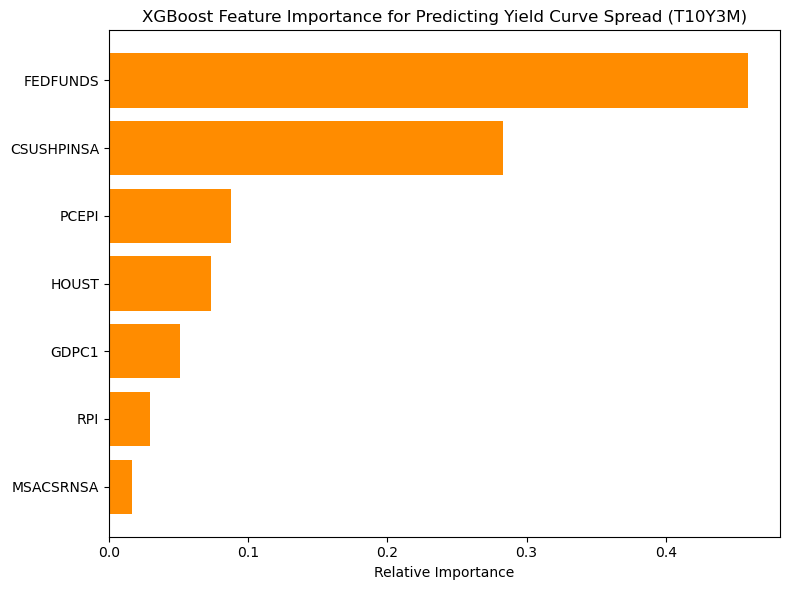

In [ ]:
# xgboost_feature_importance.py

import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("/Users/irisduan/Downloads/combined_dataset (1).csv")
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

# Define your features and target
features = [
    'CSUSHPINSA',      # House Price Index
    'HOUST',           # Housing Starts
    'MSACSRNSA',       # Monthly Supply of New Homes
    'FEDFUNDS',        # Fed Funds Rate
    'RPI',             # Real Personal Income
    'PCEPI',           # Inflation (PCE)
    'GDPC1'            # Real GDP
]
target = 'T10Y3M'       # Yield Curve Spread

# Drop missing values
df = df[features + [target]].dropna()

# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a lightweight XGBoost model
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='darkorange')
plt.title("XGBoost Feature Importance for Predicting Yield Curve Spread (T10Y3M)")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()





In [2]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Model Evaluation Metrics:
R² Score: 0.9825
RMSE: 0.1745
MAE: 0.1515
